# Titanic Warm up Project Model Iteration 1

#### Describe the dataset

In [1]:
import pandas
# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pandas.read_csv("./titanic data/train.csv")

# Print the first 5 rows of the dataframe.
# print(titanic.head(5))
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Replace all the missing values in the Age column of titanic.

In [2]:

titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())

#### Find all the unique genders -- the column appears to contain only male and female.


In [3]:
print(titanic["Sex"].unique())


['male' 'female']


#### Replace all the female values in the Sex column with 1.
#### Replace all the occurences of male with the number 0.

In [4]:

titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1

#### We'll assign the code 0 to S, 1 to C and 2 to Q. Replace each value in the Embarked column with its corresponding code.

In [5]:
# Find all the unique values for "Embarked".
print(titanic["Embarked"].unique())
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"] == "S", "Embarked"]=0
titanic.loc[titanic["Embarked"] == "C", "Embarked"]=1
titanic.loc[titanic["Embarked"] == "Q", "Embarked"]=2

['S' 'C' 'Q' nan]


In [6]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression
# Sklearn also has a helper that makes it easy to do cross validation
from sklearn.cross_validation import KFold

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm class
alg = LinearRegression()
# Generate cross validation folds for the titanic dataset.  It return the row indices corresponding to train and test.
# We set random_state to ensure we get the same splits every time we run this.
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    # The predictors we're using the train the algorithm.  Note how we only take the rows in the train folds.
    train_predictors = (titanic[predictors].iloc[train,:])
    # The target we're using to train the algorithm.
    train_target = titanic["Survived"].iloc[train]
    # Training the algorithm using the predictors and target.
    alg.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [7]:
import numpy as np

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = sum(predictions[predictions == titanic["Survived"]])/len(predictions)

/home/zhecan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [8]:
from sklearn import cross_validation
from sklearn import linear_model

# Initialize our algorithm
alg = linear_model.LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.787878787879


#### Process test data the same way we processed train data.

In [9]:
titanic_test = pandas.read_csv("./titanic data/test.csv")
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna('S')

titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"]=0
titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"]=1
titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"]=2
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())

In [10]:
# Initialize the algorithm class
alg = linear_model.LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

In [11]:
submission.to_csv('example.csv', index=False)

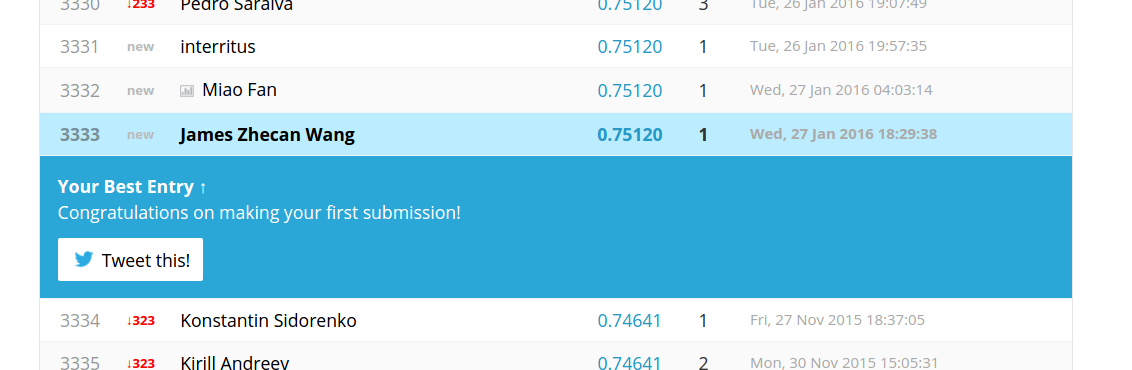

In [12]:
# ![alt text](./Screenshot\ from\ 2016-01-27\ 13\:30\:41.png)
from IPython.display import Image
Image(filename= "LeaderBoard.png") 

### Revision
1. In the feature list for training this previous model, Embarked port number is included. I do not think this feature info is very helpful for predicting survived rate so maybe if we remove it from the trainning data set, the accuracy may increase a bit.
2. Based on my data exploration from previous homework, I realize that age is a very strong factor for determing survived rate. So maybe create new feature column of doubling its values may emphasize its importance in the trainning data. 
3. Change the model from linear regression to logistic regression.

In [20]:
titanic['Double_age'] = titanic['Age']**2

In [21]:

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Double_age"]



In [22]:
from sklearn import cross_validation
from sklearn import linear_model

# Initialize our algorithm
alg = linear_model.LogisticRegression(random_state=1)
# Compute the accuracy score for all the cross validation folds.  (much simpler than what we did before!)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
# Take the mean of the scores (because we have one for each fold)
print(scores.mean())

0.787878787879


In [23]:

titanic_test['Double_age'] = titanic_test['Age']**2

# Initialize the algorithm class
alg = linear_model.LogisticRegression(random_state=1)

# Train the algorithm using all the training data
alg.fit(titanic[predictors], titanic["Survived"])

# Make predictions using the test set.
predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

In [24]:
submission.to_csv('example1.csv', index=False)

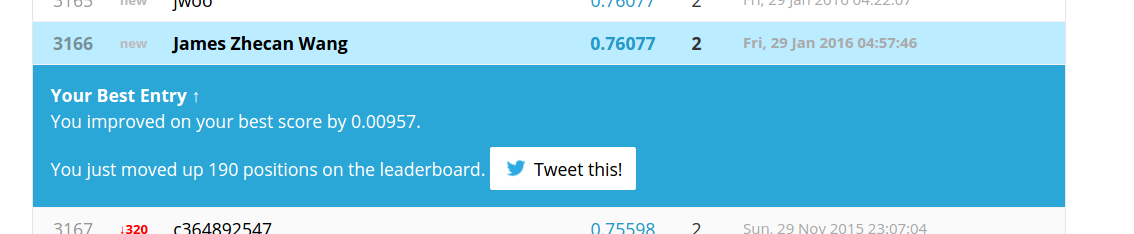

In [25]:
# ![alt text](./Screenshot\ from\ 2016-01-27\ 13\:30\:41.png)
from IPython.display import Image
Image(filename= "LeaderBoard2.png") 